# Problem Statement:- 
There are more than 550 testing points.

(1)To reduce the Testing time - work on feature engineering & Dimensionality reduction.

(2)Required only highly significant testing points.

(3)Imp:-We required the original identity of the testing points( which we suggest are significant)

(4)Build a Machine Learning model to Predict the results as Pass/fail

## Objectives
1. Importing Libraries
2. Preprocessing the data
   - Checking Missing Values
   - Checking for Outliers and treating
   - Check for Multicolinearity
   - Check for Zero Variance Columns
3. Visualisation of data   
4. Balancing the Dataset
5. feature Scaling
6. Encoding
7. Data Modelling
8. Machine Learnings models- Logistic Regression, Random Forest Classifier, XGBoost, SVM
9. Analyzing Feature Importance
10. Comparing the models
11. Conclusion

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_original=pd.read_csv("Ultrasound_1.csv")
df=df_original.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [3]:
df.shape


(1577, 577)

The dataframe contains 1577 rows and 577 columns

In [4]:
df["Pass/Fail"].value_counts(normalize=True)*100

-1    93.341788
 1     6.658212
Name: Pass/Fail, dtype: float64

In [5]:
# Let us check for null values
df.isnull().sum()

0             5
1             7
2            14
3            14
4            14
             ..
586           0
587           0
588           0
589           0
Pass/Fail     0
Length: 577, dtype: int64

In [6]:
#as there ar 577 columns we cant see all the columns So let us sort and see
df.isnull().sum().sort_values(ascending=False)

293          1439
292          1439
157          1439
158          1439
358          1351
             ... 
120             0
156             0
495             0
494             0
Pass/Fail       0
Length: 577, dtype: int64

As we can see there are 1439 null values out of 1577 rows in some columns wich is 91% of data.

We Shall drop the columns with more than 20% of missing values 

In [7]:
threshold = 0.8 * len(df)
df= df.dropna(thresh=threshold, axis=1)
print(df)

            0        1          2          3       4      5         6       7  \
0     2973.86  2359.01  2196.6555  1066.1908  1.2188  100.0  101.8900  0.1215   
1     3052.82  2525.33  2186.2667  1088.7359  1.2723  100.0  103.5633  0.1216   
2     2914.47  2492.14  2181.6111  1083.3937  1.2484  100.0  104.1478  0.1219   
3     2959.86  2491.19  2208.0000  1835.9832  1.5714  100.0  100.2478  0.1239   
4     2964.77  2524.44  2181.5111  1177.0830  1.3012  100.0  100.9333  0.1216   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1572  2855.80  2637.35  2183.4333  1582.5646  1.3666  100.0   99.0267  0.1240   
1573  2940.22  2417.85  2246.4899  1006.9548  1.0997  100.0  103.3222  0.1184   
1574  2971.99  2522.62  2239.3000  1192.7495  1.2499  100.0  100.1189  0.1187   
1575  2948.53  2459.87  2202.7111  1010.4454  1.0032  100.0  104.3067  0.1225   
1576  2946.41  2503.59  2246.4899  1006.9548  1.0997  100.0  103.3222  0.1184   

           8       9  ...  

In [8]:
df.shape

(1577, 545)

In [9]:
#we shall drop columns with zero variance during the modeling phase of a machine learning project. 
#Columns with zero variance provide no information for the model,
#because they have constant values and do not contribute to the variability in the data.
df = df.loc[:, df.var() != 0]
df.shape

(1577, 441)

In [10]:
#let us find any dupicate columns if there are any
duplicated_columns = df.columns[df.columns.duplicated(keep=False)]
print("Duplicated Columns:", duplicated_columns)


Duplicated Columns: Index([], dtype='object')


There are no duplicated columns

In [11]:
#let us sepearte the dependent and indepent features
df_X=df.drop(["Pass/Fail"],axis=1)
print(df_X)
df_X.shape

            0        1          2          3       4         6       7  \
0     2973.86  2359.01  2196.6555  1066.1908  1.2188  101.8900  0.1215   
1     3052.82  2525.33  2186.2667  1088.7359  1.2723  103.5633  0.1216   
2     2914.47  2492.14  2181.6111  1083.3937  1.2484  104.1478  0.1219   
3     2959.86  2491.19  2208.0000  1835.9832  1.5714  100.2478  0.1239   
4     2964.77  2524.44  2181.5111  1177.0830  1.3012  100.9333  0.1216   
...       ...      ...        ...        ...     ...       ...     ...   
1572  2855.80  2637.35  2183.4333  1582.5646  1.3666   99.0267  0.1240   
1573  2940.22  2417.85  2246.4899  1006.9548  1.0997  103.3222  0.1184   
1574  2971.99  2522.62  2239.3000  1192.7495  1.2499  100.1189  0.1187   
1575  2948.53  2459.87  2202.7111  1010.4454  1.0032  104.3067  0.1225   
1576  2946.41  2503.59  2246.4899  1006.9548  1.0997  103.3222  0.1184   

           8       9      10  ...     576      577     582     583     584  \
0     1.4544 -0.0052 -0.0003  ...

(1577, 440)

In [12]:
df_y=df["Pass/Fail"]
print(df_y)
df_y.shape

0       1
1      -1
2      -1
3       1
4       1
       ..
1572   -1
1573   -1
1574    1
1575   -1
1576   -1
Name: Pass/Fail, Length: 1577, dtype: int64


(1577,)

### We shall eliminate the highly correlated features as they introduce Multicolinearity

In [13]:
#let us find corelation matrix using pandas
corr_matrix=df_X.corr()
print(corr_matrix)


            0         1         2         3         4         6         7  \
0    1.000000 -0.144341 -0.003322  0.005753 -0.011066 -0.008220  0.032730   
1   -0.144341  1.000000  0.004423 -0.003721 -0.001547 -0.028009 -0.011023   
2   -0.003322  0.004423  1.000000  0.300444  0.096092 -0.138970 -0.275052   
3    0.005753 -0.003721  0.300444  1.000000 -0.058178 -0.685091  0.139602   
4   -0.011066 -0.001547  0.096092 -0.058178  1.000000 -0.074444 -0.914619   
..        ...       ...       ...       ...       ...       ...       ...   
585  0.030398  0.002865 -0.003886  0.038213 -0.001044 -0.050471  0.008833   
586  0.019482 -0.009945 -0.024517  0.031521 -0.043709 -0.037975  0.055322   
587 -0.016919  0.016274 -0.032887 -0.041436 -0.030795  0.037475 -0.022635   
588 -0.019204  0.008875 -0.035671 -0.035689 -0.025911  0.035084 -0.021778   
589  0.010516  0.045216 -0.034957 -0.079791  0.051270  0.043639 -0.106308   

            8         9        10  ...       576       577       582  \
0  

In [14]:
#let us put 0.7 as the threshold correlation for the multicolinearity
threshold = 0.7

# Identify and remove highly correlated features
features_to_remove = []
for col in corr_matrix.columns:
    for other_col in corr_matrix.columns:
        if col != other_col and abs(corr_matrix.loc[col, other_col]) >= threshold:
            features_to_remove.append(other_col)

# Drop identified features
df_X_filtered = df_X.drop(features_to_remove, axis=1)


In [15]:
print(df_X_filtered)

            0        1          2          3         6       8       9  \
0     2973.86  2359.01  2196.6555  1066.1908  101.8900  1.4544 -0.0052   
1     3052.82  2525.33  2186.2667  1088.7359  103.5633  1.4891 -0.0007   
2     2914.47  2492.14  2181.6111  1083.3937  104.1478  1.5568 -0.0214   
3     2959.86  2491.19  2208.0000  1835.9832  100.2478  1.4680  0.0033   
4     2964.77  2524.44  2181.5111  1177.0830  100.9333  1.4047 -0.0080   
...       ...      ...        ...        ...       ...     ...     ...   
1572  2855.80  2637.35  2183.4333  1582.5646   99.0267  1.4912 -0.0004   
1573  2940.22  2417.85  2246.4899  1006.9548  103.3222  1.5218 -0.0283   
1574  2971.99  2522.62  2239.3000  1192.7495  100.1189  1.5824 -0.0006   
1575  2948.53  2459.87  2202.7111  1010.4454  104.3067  1.5877 -0.0108   
1576  2946.41  2503.59  2246.4899  1006.9548  103.3222  1.6026 -0.0252   

          10        12       14  ...      547     548     558      562  \
0    -0.0003  198.2289   9.5221  ... 

In [16]:
# now we are left with 100 Columns
#let us check we still have missing values
df_X_filtered.isna().sum().sort_values(ascending=False)

563    272
562    272
548    261
547    261
90      51
      ... 
115      0
113      0
86       0
87       0
589      0
Length: 100, dtype: int64

 we still have Missing values in the data let us impute them with the median as all the columns are numerical in nature

In [17]:

df_X_filled = df_X_filtered.fillna(df_X_filtered.median())
print(df_X_filled)


            0        1          2          3         6       8       9  \
0     2973.86  2359.01  2196.6555  1066.1908  101.8900  1.4544 -0.0052   
1     3052.82  2525.33  2186.2667  1088.7359  103.5633  1.4891 -0.0007   
2     2914.47  2492.14  2181.6111  1083.3937  104.1478  1.5568 -0.0214   
3     2959.86  2491.19  2208.0000  1835.9832  100.2478  1.4680  0.0033   
4     2964.77  2524.44  2181.5111  1177.0830  100.9333  1.4047 -0.0080   
...       ...      ...        ...        ...       ...     ...     ...   
1572  2855.80  2637.35  2183.4333  1582.5646   99.0267  1.4912 -0.0004   
1573  2940.22  2417.85  2246.4899  1006.9548  103.3222  1.5218 -0.0283   
1574  2971.99  2522.62  2239.3000  1192.7495  100.1189  1.5824 -0.0006   
1575  2948.53  2459.87  2202.7111  1010.4454  104.3067  1.5877 -0.0108   
1576  2946.41  2503.59  2246.4899  1006.9548  103.3222  1.6026 -0.0252   

          10        12       14  ...      547     548     558      562  \
0    -0.0003  198.2289   9.5221  ... 

In [18]:
df_X_filled.isna().sum().sort_values(ascending=False)


0      0
132    0
472    0
468    0
460    0
      ..
63     0
61     0
59     0
58     0
589    0
Length: 100, dtype: int64

All the missing values are impute

## Visualisation

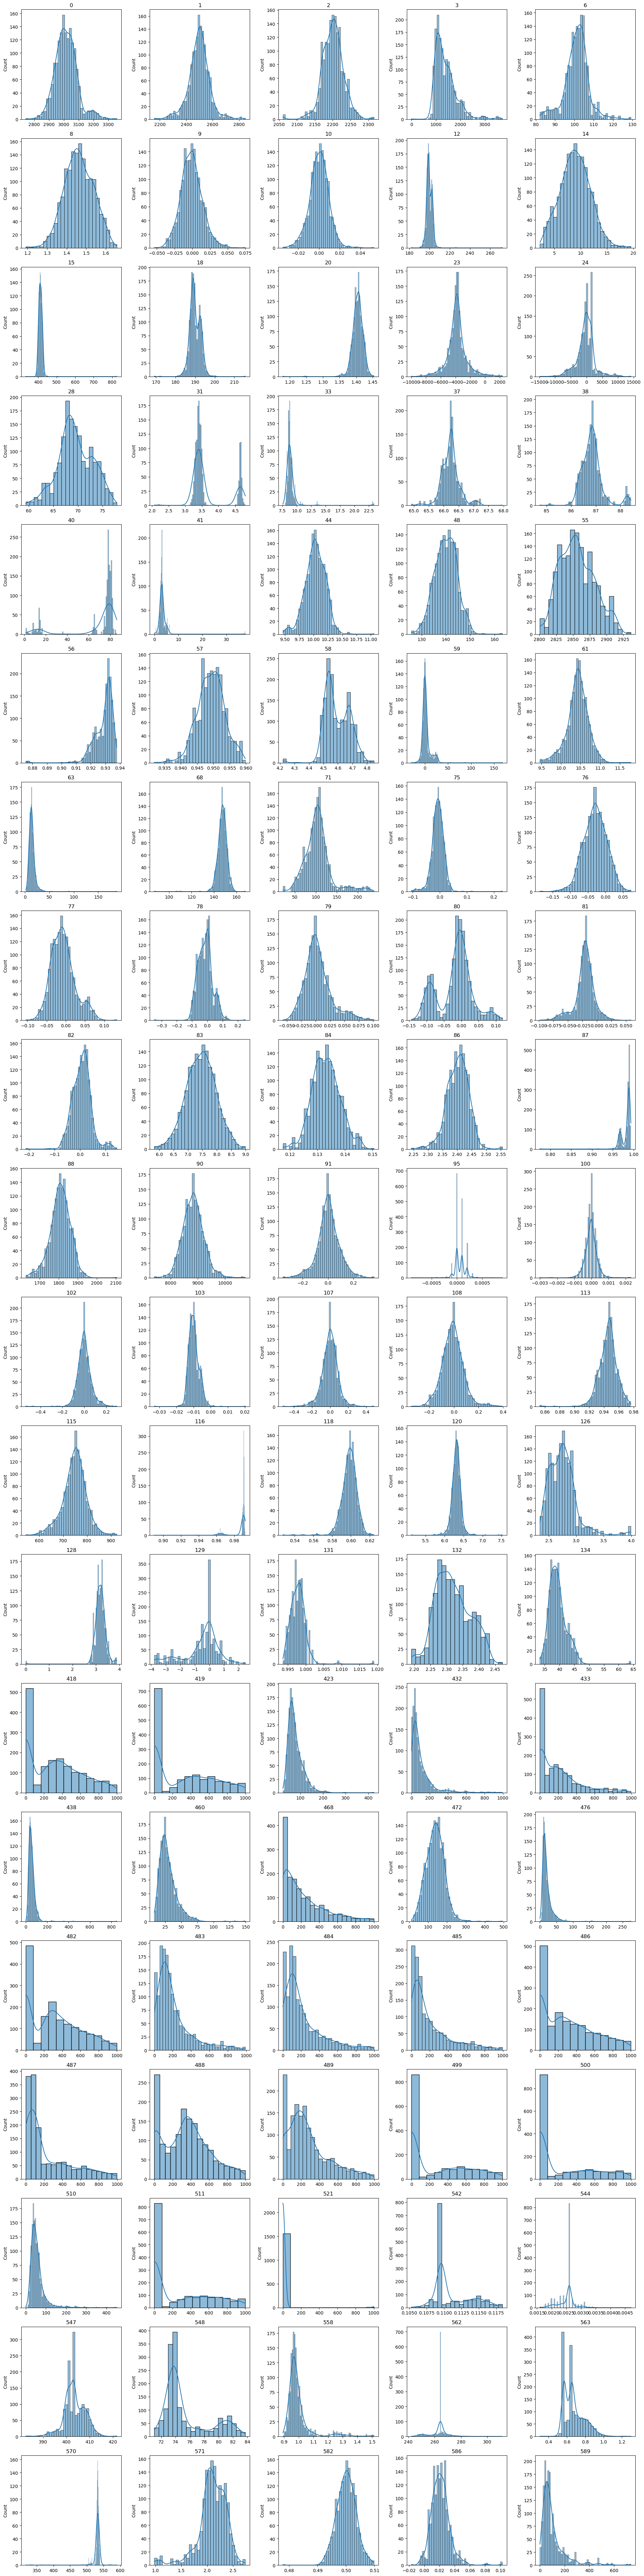

In [19]:
#Let us Visualize the columns and analyze the distributions 
num_cols = 5  
num_rows = 20

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, column in enumerate(df_X_filled.columns):
    ax = axes[i]
    sns.histplot(df_X_filled[column], kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Most of the columns are Normaly distributed and some columns are skewed this may be beacause of the presence of outliers. lets look for outliers 

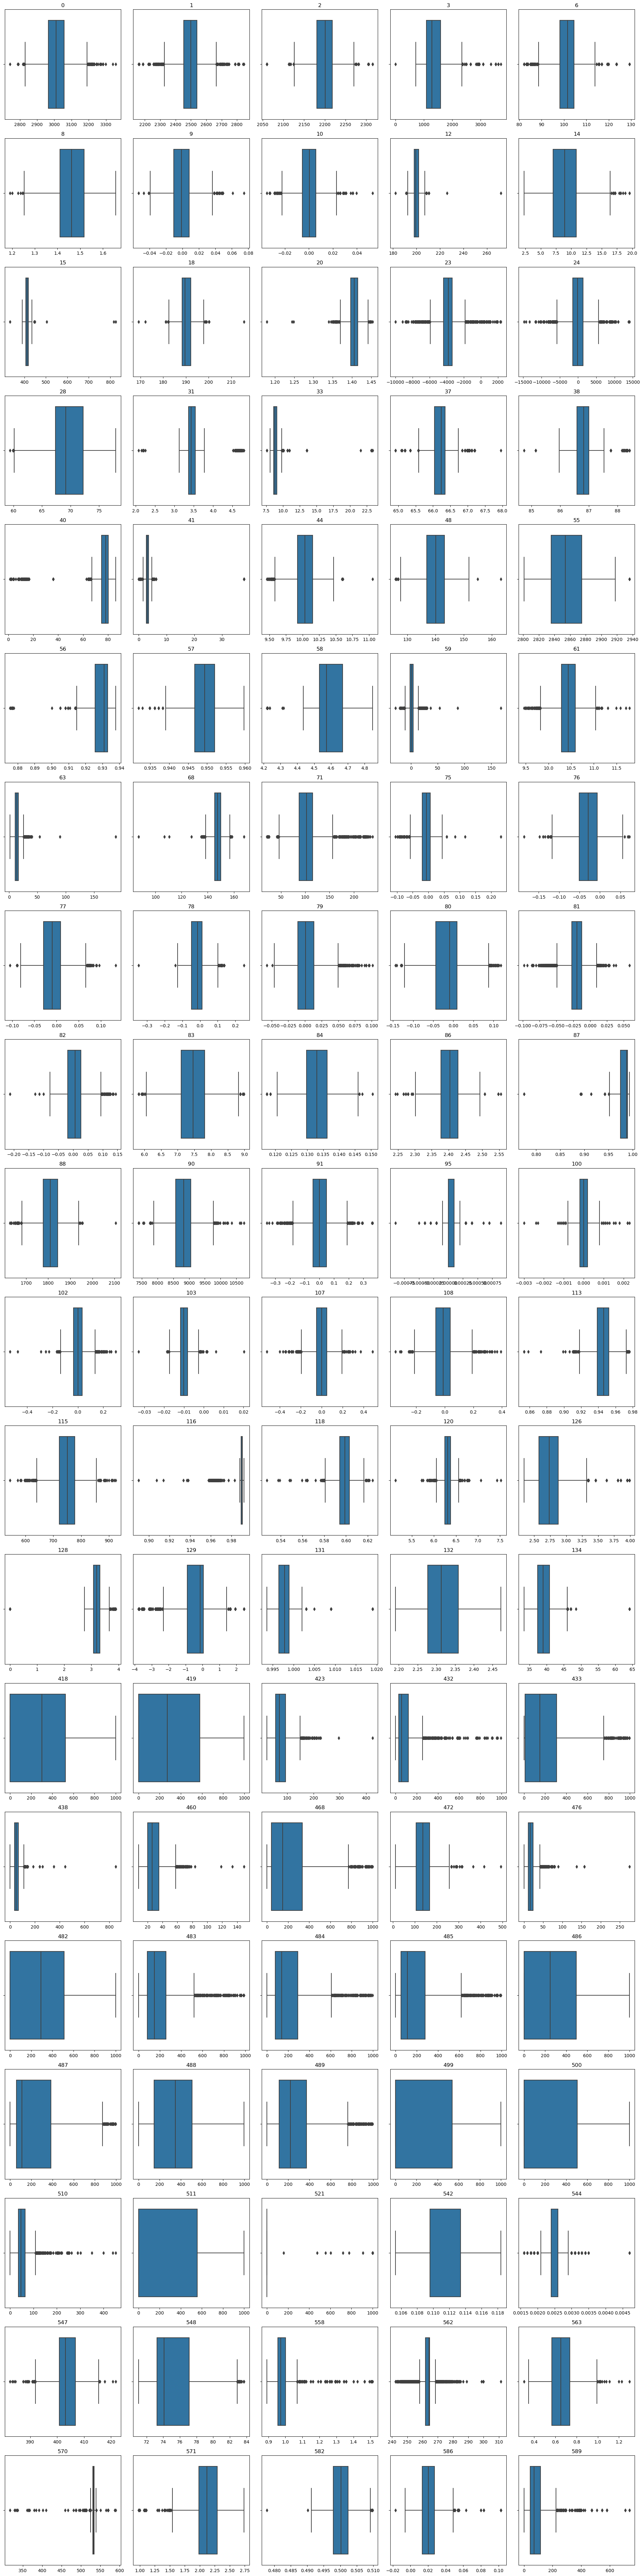

In [20]:
fig, axes = plt.subplots(20, 5, figsize=(20, 4 * 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a box plot
for i, column in enumerate(df_X_filled.columns):
    ax = axes[i]
    sns.boxplot(x=df_X_filled[column], ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### There are outliers in many columns, But in health sector models we usualy dont remove/impute the outliers as it  may lead to loss of data

Distribution of Most of the columns are normaly distributed or nearly normal distribution

## Visualizing Target Column

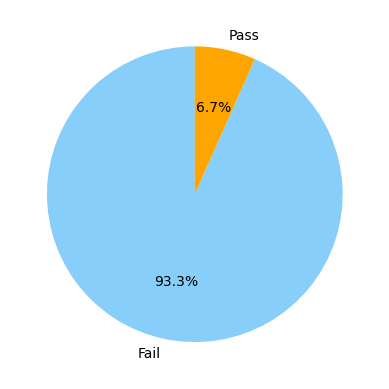

In [21]:
# Define labels for each slice
labels = ["Fail", "Pass",]
# Create the pie chart
plt.pie(df_y.value_counts(), labels=labels, colors=["lightskyblue", "orange"], autopct="%1.1f%%",startangle=90)
plt.show()

## 93.3% Data Belong to the Fail category and 6.7% data Belongs to the Pass Category
This indicates the imbalance in the data set, majority of the data belongs to Fail category and Pass category remians the minority. This problem is would lead to the bad performance of the model due to the over representation of the Fail data, therefore the imbalance is to be treated before training machine learning model 

In [92]:
#encode the target column as 0 1 for xgboost classifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_y = label_encoder.fit_transform(df_y)

In [93]:
df_y

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

## Train_Test_Split

In [94]:
from sklearn.model_selection import train_test_split
X= df_X_filled
y= df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=df_y, random_state=42)
print(X_train.shape,X_test.shape)
pd.DataFrame(X_train, columns=X.columns)

(1261, 100) (316, 100)


,0,1,2,3,6,8,9,10,12,14,...,547,548,558,562,563,570,571,582,586,589
882,3007.47,2571.18,2187.4111,1942.3069,88.0911,1.3746,0.0012,0.0107,202.7188,8.2783,...,399.060,73.546,1.0063,264.272,0.5671,532.0973,2.1448,0.5010,0.0262,46.7092
1263,2983.73,2459.87,2162.1333,998.9095,104.9722,1.3897,-0.0091,-0.0024,202.3476,5.7019,...,405.406,73.576,1.0252,271.778,0.5366,531.4591,1.9611,0.5016,0.0152,50.5947
1133,3217.96,2485.80,2137.6111,950.5720,105.1889,1.5947,-0.0112,0.0025,195.5517,4.6575,...,401.202,73.916,0.9237,264.272,0.5671,529.9445,1.9740,0.4996,0.0256,38.1727
839,2984.06,2619.60,2225.0222,1730.8480,98.5978,1.4696,0.0081,0.0063,198.3282,8.6658,...,399.330,80.764,0.9864,264.272,0.5671,534.1482,1.6633,0.4978,0.0128,151.1930
317,3054.70,2450.48,2201.5889,956.1617,105.4122,1.5305,0.0007,-0.0068,200.7318,8.7155,...,403.128,74.089,0.9789,264.272,0.5671,535.5691,1.7613,0.4992,0.0216,84.6151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2988.39,2493.72,2206.4000,982.5452,116.8167,1.5279,-0.0094,0.0001,199.9316,9.7716,...,400.896,76.260,0.9274,269.728,0.7794,530.0846,1.9812,0.4972,-0.0006,0.0000
1515,3012.34,2416.09,2192.7889,1268.5852,104.5867,1.3010,-0.0060,0.0006,196.9294,14.6744,...,400.188,73.152,1.0438,255.722,0.6848,537.1318,2.2109,0.5029,0.0263,26.5137
1255,2970.86,2510.19,2236.1111,1546.5931,90.4233,1.3582,-0.0364,0.0032,199.4587,9.8188,...,400.330,72.742,1.0252,271.574,0.7344,532.0973,2.0850,0.5001,0.0243,41.0782
1339,2990.85,2472.74,2223.0444,1194.5986,112.5811,1.3533,0.0013,0.0064,201.9929,7.7739,...,399.390,72.676,0.9711,271.726,0.7067,532.1073,1.8126,0.4993,0.0346,72.6469


## Balancing Data Set

In [98]:
#Lets Balance the dataset using SMOTE Method
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, Y_train_sm = sm.fit_resample(X_train, y_train)
print("no of value in y_train Before SMOTE",y_train.shape)
print("no of value in y_train After SMOTE",Y_train_sm.shape)
print('---------------------------')
print("No of Rows Before SMOTE",len(df_X_filled))
print("No of Rows Before SMOTE",len(X_train_sm))


no of value in y_train Before SMOTE (1261,)
no of value in y_train After SMOTE (2354,)
---------------------------
No of Rows Before SMOTE 1577
No of Rows Before SMOTE 2354


In [99]:
df_X_filled.describe()

,0,1,2,3,6,8,9,10,12,14,...,547,548,558,562,563,570,571,582,586,589
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,3014.632324,2495.750228,2200.438865,1393.870125,101.123770,1.463005,-0.000962,0.000151,199.931241,8.972856,...,403.504280,75.447377,0.99445,262.962840,0.675233,530.561916,2.103071,0.500125,0.021380,99.824653
std,73.744314,79.937418,29.296169,439.307063,6.187326,0.073889,0.015092,0.009287,3.251984,2.832713,...,4.543324,3.178694,0.08277,6.964578,0.110548,17.429581,0.274905,0.003370,0.012313,93.718244
min,2743.240000,2158.750000,2060.660000,0.000000,82.131100,1.191000,-0.053400,-0.034900,182.094000,2.249300,...,382.534000,71.038000,0.89190,242.286000,0.304900,317.196400,0.980200,0.477800,-0.016900,0.000000
25%,2966.240000,2453.450000,2181.155500,1083.393700,98.113300,1.411300,-0.010800,-0.005500,198.128300,7.042700,...,400.814000,73.254000,0.95520,261.972000,0.567100,530.703600,1.983300,0.497900,0.013400,44.368600
50%,3011.095000,2499.570000,2200.988900,1283.436800,101.566700,1.461500,-0.001400,0.000400,199.506200,8.929400,...,403.128000,74.089000,0.97250,264.272000,0.653500,532.422700,2.120600,0.500200,0.020500,71.778000
75%,3057.030000,2538.430000,2217.866700,1588.509000,104.521100,1.517100,0.008200,0.005900,201.983800,10.852500,...,406.752000,77.110000,1.00080,264.622000,0.737600,534.393600,2.290900,0.502400,0.027500,116.108800
max,3356.350000,2846.440000,2315.266700,3715.041700,129.252200,1.656400,0.074900,0.053000,272.045100,19.546500,...,421.702000,83.720000,1.51210,311.404000,1.298800,589.508200,2.739500,0.509800,0.102800,737.304800


As we can observe the Statistical Details of the Columns each columns has different range of values, Some columns are in thousands and some columns are in decimals, we shall standardise the columns to scale them on similar units.

## Standarising the Features

In [100]:
# Using Standard scaler to standardize the data as data is nearly Normaly distributed
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled_X_train=scaler.fit_transform(X_train_sm)
scaled_X_test=scaler.transform(X_test)

pd.DataFrame(scaled_X_train, columns=X.columns)


,0,1,2,3,6,8,9,10,12,14,...,547,548,558,562,563,570,571,582,586,589
0,-0.044166,1.010816,-0.491684,1.514201,-2.493081,-1.486967,0.239917,1.153583,0.966985,-0.045009,...,-1.199724,-0.687686,0.183629,0.313124,-1.098617,0.108485,0.148956,0.222791,0.425942,-0.651145
1,-0.374080,-0.566019,-1.398592,-1.014079,0.707513,-1.248009,-0.546027,-0.350115,0.839116,-1.009809,...,0.408243,-0.677746,0.432933,1.488003,-1.434665,0.075611,-0.503181,0.413100,-0.581484,-0.604602
2,2.881010,-0.198690,-2.278392,-1.143622,0.748598,1.996130,-0.706268,0.212337,-1.501901,-1.400911,...,-0.656978,-0.565095,-0.905921,0.313124,-1.098617,-0.002408,-0.457386,-0.221262,0.370992,-0.753401
3,-0.369494,1.696742,0.857714,0.947497,-0.501050,0.016414,0.766423,0.648524,-0.545466,0.100100,...,-1.131311,1.703826,-0.078866,0.313124,-1.098617,0.214129,-1.560374,-0.792188,-0.801286,0.600432
4,0.612189,-0.699039,0.016982,-1.128642,0.790935,0.980161,0.201765,-0.855174,0.282514,0.118712,...,-0.168963,-0.507776,-0.177796,0.313124,-1.098617,0.287321,-1.212473,-0.348135,0.004655,-0.197083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,0.132495,0.827116,-0.365380,-0.730313,0.385508,0.066978,-0.134841,-0.466670,0.100594,-0.028144,...,1.060676,0.117809,-0.486883,0.452095,0.816572,-0.123100,-2.370949,-0.139725,0.125997,-0.683204
2350,-1.093061,1.617314,-0.794241,-0.597636,0.348611,0.496374,-0.545660,0.558228,-1.181554,0.864560,...,1.074582,-1.061616,-0.353986,0.359546,-0.527122,0.071438,0.413118,0.328123,0.432209,0.550142
2351,-0.719915,0.590717,0.683689,-0.733245,0.010119,1.350121,0.225337,0.966407,0.364880,-0.756405,...,0.037565,1.871164,-0.614022,0.463512,0.554707,0.102058,0.715592,-1.220152,-0.204470,0.609263
2352,-0.593188,0.337286,0.213682,-0.518008,-0.126543,0.233180,-0.212340,0.493562,-0.530707,0.087250,...,-0.857111,1.758036,-0.150601,0.181082,0.286107,0.214367,0.372278,-1.008723,-0.132372,-0.272665


# Training the Models with Variour Algorithms
## Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

#Training
LR.fit(scaled_X_train,Y_train_sm)

#Prediction
y_pred_train = LR.predict(scaled_X_train)
y_pred_test = LR.predict(scaled_X_test)


### Evaluating the model

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
LR_train_accu = accuracy_score(Y_train_sm,y_pred_train)

LR_test_accu =  accuracy_score(y_test,y_pred_test)

print("Logistic Regression Training Data Accuracy : ",LR_train_accu )
print("Logistic Regression Testing Data Accuracy : ",LR_test_accu )


Logistic Regression Training Data Accuracy :  0.8581138487680544
Logistic Regression Testing Data Accuracy :  0.810126582278481


### confusion_matrix for LR model

In [103]:
print("Confusion Matrix for Training Data : ")
print(confusion_matrix(Y_train_sm,y_pred_train))
print()
print("Confusion Matrix for Testing Data : ")
print(confusion_matrix(y_test,y_pred_test))


Confusion Matrix for Training Data : 
[[ 954  223]
 [ 111 1066]]

Confusion Matrix for Testing Data : 
[[247  48]
 [ 12   9]]


### Classification report for LR  model

In [104]:
print("Classifiction report of Train data for SVM:")
print(classification_report(Y_train_sm,y_pred_train))
print()
print("Classifiction report of test data for SVM:")
print(classification_report(y_test,y_pred_test))

Classifiction report of Train data for SVM:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1177
           1       0.83      0.91      0.86      1177

    accuracy                           0.86      2354
   macro avg       0.86      0.86      0.86      2354
weighted avg       0.86      0.86      0.86      2354


Classifiction report of test data for SVM:
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       295
           1       0.16      0.43      0.23        21

    accuracy                           0.81       316
   macro avg       0.56      0.63      0.56       316
weighted avg       0.90      0.81      0.85       316



### Cross Validation Technique for the above Logistic Regression model

In [105]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Training_scores = cross_val_score(LR, scaled_X_train,Y_train_sm, cv=kfold, scoring='accuracy')
Testing_scores = cross_val_score(LR, scaled_X_test,y_test, cv=kfold, scoring='accuracy')

LR_CV_mean_accu_test = Training_scores.mean()
print("Train Mean accuracy : ",LR_CV_mean_accu_test.mean())

LR_CV_mean_accu_train = Testing_scores.mean()
print("Test Mean accuracy : ",LR_CV_mean_accu_train)


Train Mean accuracy :  0.8326295342639021
Test Mean accuracy :  0.9018849206349205


### ROC AUC Curve for Logistic Regression

ROC Area under the curve is:  0.7665859564164649


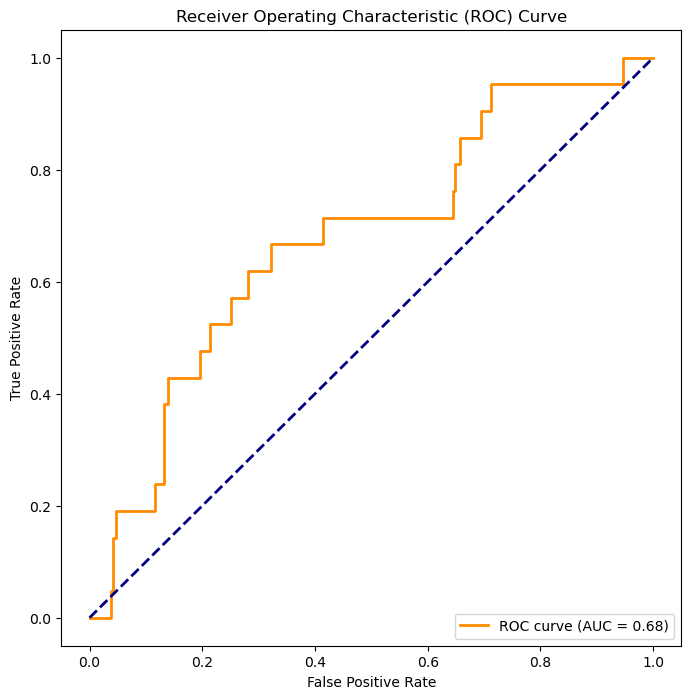

In [126]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_prob = LR.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_LR = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_LR:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Support Vector Mechanism

In [107]:
from sklearn.svm import SVC
SVM_classifier=SVC(probability=True)

#Training model
SVM_classifier.fit(scaled_X_train,Y_train_sm)

#Prediction
SVM_Y_pred_train = SVM_classifier.predict(scaled_X_train)
SVM_Y_pred_test = SVM_classifier.predict(scaled_X_test)


### Evaluating the model

In [108]:

SVM_train_accu = accuracy_score(Y_train_sm,SVM_Y_pred_train)
SVM_test_accu = accuracy_score(y_test,SVM_Y_pred_test)

print("Train data Accuracy of SVM model : ",SVM_train_accu)
print("Test data Accuracy of SVM model : ",SVM_test_accu)


Train data Accuracy of SVM model :  1.0
Test data Accuracy of SVM model :  0.930379746835443


### Confusion matrix for SVM model

In [109]:
print("Confusion Matrix of Train data for SVM model : ")
print(confusion_matrix(Y_train_sm,SVM_Y_pred_train))
print()
print("Confusion Matrix of Test data for SVM model : ")
print(confusion_matrix(y_test,SVM_Y_pred_test))

Confusion Matrix of Train data for SVM model : 
[[1177    0]
 [   0 1177]]

Confusion Matrix of Test data for SVM model : 
[[292   3]
 [ 19   2]]


### Classification Report

In [110]:
print("Classifiction report of Train data for SVM:")
print(classification_report(Y_train_sm,SVM_Y_pred_train))
print()
print("Classifiction report of test data for SVM:")
print(classification_report(y_test,SVM_Y_pred_test))

Classifiction report of Train data for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1177
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354


Classifiction report of test data for SVM:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       295
           1       0.40      0.10      0.15        21

    accuracy                           0.93       316
   macro avg       0.67      0.54      0.56       316
weighted avg       0.90      0.93      0.91       316



### Cross Validation Technique for the above SVM model

In [111]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Training_scores = cross_val_score(SVM_classifier, scaled_X_train, Y_train_sm, cv=kfold, scoring='accuracy')
Testing_scores = cross_val_score(SVM_classifier, scaled_X_test, y_test, cv=kfold, scoring='accuracy')

SVM_CV_mean_accu_train = Training_scores.mean()
print("Train Mean accuracy : ",SVM_CV_mean_accu_train)

SVM_CV_mean_accu_test = Testing_scores.mean()
print("Test Mean accuracy : ", SVM_CV_mean_accu_test)


Train Mean accuracy :  0.9961756335546822
Test Mean accuracy :  0.9335813492063492


### ROC-AUC Curve for SVM model

ROC Area under the curve is:  0.7665859564164649


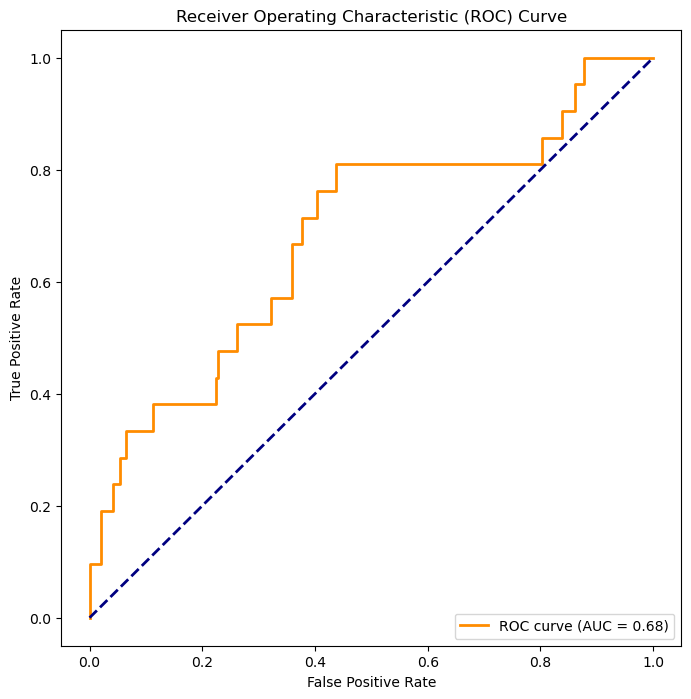

In [127]:
y_prob = SVM_classifier.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_SVM = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_SVM:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Random Forest Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(max_depth=20, min_samples_leaf=1)

#Training Model
rfr.fit(scaled_X_train,Y_train_sm)

#predictions
rfr_train_ypred = rfr.predict(scaled_X_train)
rfr_test_ypred = rfr.predict(scaled_X_test)


# Acccuracy Score
rfr_train_accu = accuracy_score(Y_train_sm,rfr_train_ypred )
print("RFR Training data Accuracy : ",rfr_train_accu)

print()
rfr_test_accu = accuracy_score(y_test,rfr_test_ypred)
print("RFR Testing data Accuracy : ",rfr_test_accu)

RFR Training data Accuracy :  1.0

RFR Testing data Accuracy :  0.9208860759493671


### Confusion Matrix for RFR model

In [114]:
print("Confusion Matrix of Train data for RFR model : ")
print(confusion_matrix(Y_train_sm,rfr_train_ypred))
print()
print("Confusion Matrix of Test data for RFR model : ")
print(confusion_matrix(y_test,rfr_test_ypred))

Confusion Matrix of Train data for RFR model : 
[[1177    0]
 [   0 1177]]

Confusion Matrix of Test data for RFR model : 
[[289   6]
 [ 19   2]]


### Classification report

In [115]:
print("Classifiction report of Train data for RFR:")
print(classification_report(Y_train_sm,rfr_train_ypred))
print()
print("Classifiction report of test data for RFR:")
print(classification_report(y_test,rfr_test_ypred))

Classifiction report of Train data for RFR:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1177
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354


Classifiction report of test data for RFR:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.25      0.10      0.14        21

    accuracy                           0.92       316
   macro avg       0.59      0.54      0.55       316
weighted avg       0.89      0.92      0.90       316



### Cross Validation Technique for the above RFR model

In [116]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
Training_scores = cross_val_score(rfr, scaled_X_train,Y_train_sm, cv=kfold, scoring='accuracy')
Testing_scores = cross_val_score(rfr, scaled_X_test,y_test, cv=kfold, scoring='accuracy')

rfr_CV_mean_accu_train = Training_scores.mean()
print("Train Mean accuracy : ",rfr_CV_mean_accu_train)

rfr_CV_mean_accu_test = Testing_scores.mean()
print("Test Mean accuracy : ",rfr_CV_mean_accu_test)

Train Mean accuracy :  0.984280616162985
Test Mean accuracy :  0.930406746031746


### ROC_AUC Curve for RFR Model

ROC Area under the curve is:  0.7665859564164649


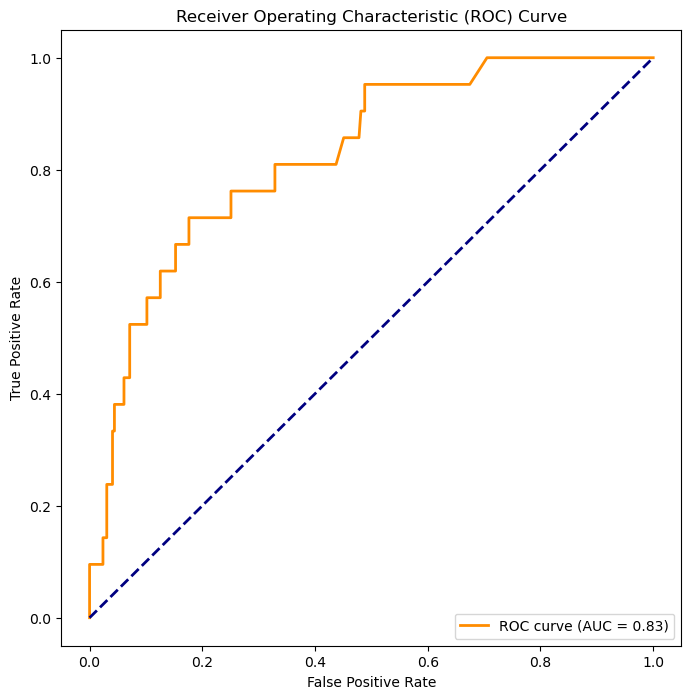

In [128]:
y_prob = rfr.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_RFR = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_RFR:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XG-Boost

In [89]:
!pip install xgboost
                              

     -------------------------------------- 99.8/99.8 MB 531.9 kB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 MB 1.2 MB/s eta 0:00:00


In [119]:
from xgboost import XGBClassifier

#training 
xgb = XGBClassifier()
xgb.fit(scaled_X_train,Y_train_sm)

#Predictions
y_pred_train_xgb = xgb.predict(scaled_X_train)
y_pred_test_xgb = xgb.predict(scaled_X_test)

### Accuracy Score for XGB 

In [120]:
xgb_train_accu = accuracy_score(Y_train_sm,y_pred_train_xgb )
print("XGB Training data Accuracy : ",xgb_train_accu)

print()
xgb_test_accu = accuracy_score(y_test,y_pred_test_xgb)
print("XGB Testing data Accuracy : ",xgb_test_accu)

XGB Training data Accuracy :  1.0

XGB Testing data Accuracy :  0.930379746835443


### Confusion matrx for XGB

In [121]:
print("Confusion Matrix of Train data for XGB model : ")
print(confusion_matrix(Y_train_sm,y_pred_train_xgb ))
print()
print("Confusion Matrix of Test data for XGB model : ")
print(confusion_matrix(y_test,y_pred_test_xgb))

Confusion Matrix of Train data for XGB model : 
[[1177    0]
 [   0 1177]]

Confusion Matrix of Test data for XGB model : 
[[290   5]
 [ 17   4]]


### Classification Report for XGB

In [122]:
print("Classifiction report of Train data for RFR:")
print(classification_report(Y_train_sm,y_pred_train_xgb))
print()
print("Classifiction report of test data for RFR:")
print(classification_report(y_test,y_pred_test_xgb))

Classifiction report of Train data for RFR:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1177
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2354
   macro avg       1.00      1.00      1.00      2354
weighted avg       1.00      1.00      1.00      2354


Classifiction report of test data for RFR:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       295
           1       0.44      0.19      0.27        21

    accuracy                           0.93       316
   macro avg       0.69      0.59      0.62       316
weighted avg       0.91      0.93      0.92       316



### Cross Validation technique for XGB

In [123]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

Training_scores = cross_val_score(xgb, scaled_X_train,Y_train_sm, cv=kfold, scoring='accuracy')
Testing_scores = cross_val_score(xgb, scaled_X_test,y_test, cv=kfold, scoring='accuracy')

XGB_CV_mean_accu_train = Training_scores.mean()
print("Train Mean accuracy : ",XGB_CV_mean_accu_train)

XGB_CV_mean_accu_test = Testing_scores.mean()
print("Test Mean accuracy : ",XGB_CV_mean_accu_test)

Train Mean accuracy :  0.9825839092921355
Test Mean accuracy :  0.9335813492063492


### ROC-AUC curve for XGB

ROC Area under the curve is:  0.7665859564164649


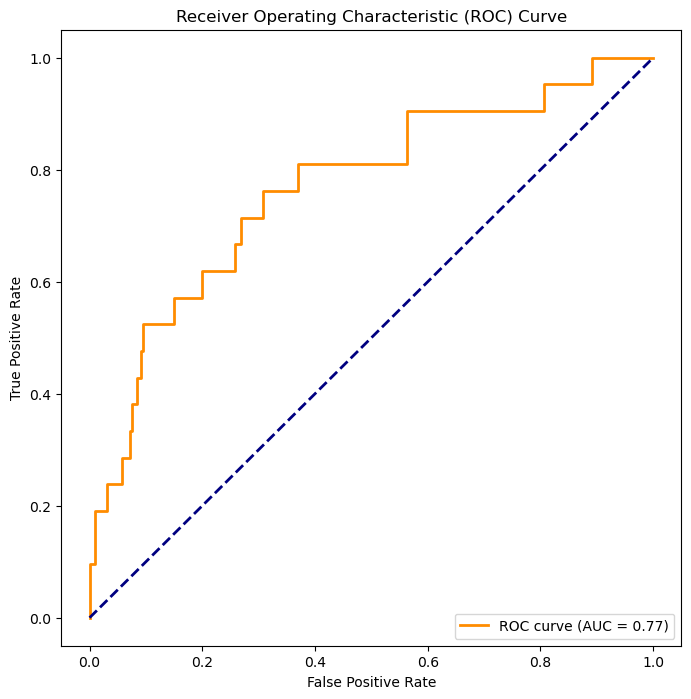

In [129]:
y_prob = xgb.predict_proba(scaled_X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_XGB = auc(fpr, tpr)
print("ROC Area under the curve is: ",roc_auc)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_XGB:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Finding the best model
### Comparing the value of Area under the curve of ROC-AUC of all the trained models

As our data is highly imbalanced chosing accuracy score woulb be misleading to meassure the performance of the model. Beacause accuracy does not account for the class distribution. In the context of imbalanced datasets, where one class significantly outnumbers the other. Hense we chose ROC-AUC curve to be the better meassure of the models

In [131]:
Algorithms=["Logistic Regression","SVM","Random Forest","XG-Boost"]
ROC_AUC_values=[roc_auc_LR,roc_auc_SVM,roc_auc_RFR,roc_auc_XGB]

#creating dataframe
data = {
    'Algorithms': ["Logistic Regression", "SVM", "Random Forest", "XG-Boost"],
    'ROC_AUC_values': [roc_auc_LR, roc_auc_SVM, roc_auc_RFR, roc_auc_XGB]
}

df = pd.DataFrame(data)
df.head()

,Algorithms,ROC_AUC_values
0,Logistic Regression,0.676352
1,SVM,0.682809
2,Random Forest,0.826150
3,XG-Boost,0.766586


## PLoting on Bar Plot

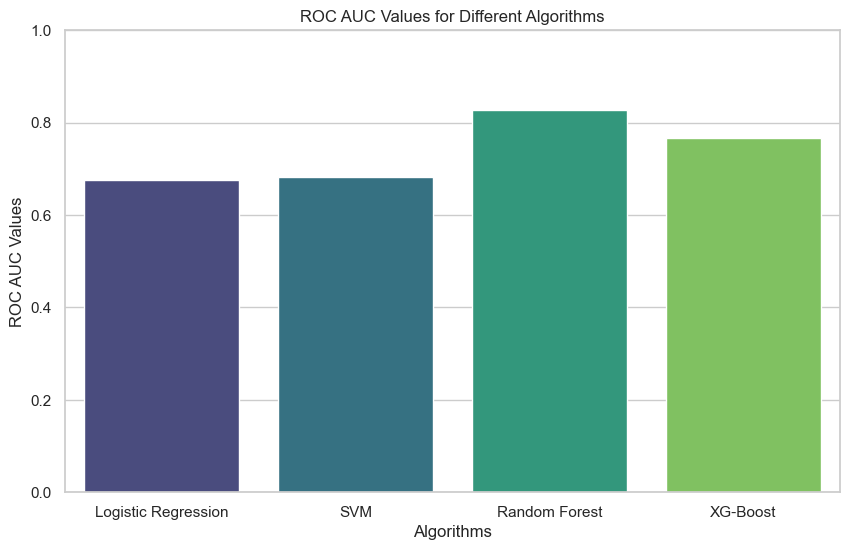

In [132]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Algorithms', y='ROC_AUC_values', data=df, palette='viridis')
plt.xlabel('Algorithms')
plt.ylabel('ROC AUC Values')
plt.title('ROC AUC Values for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for ROC AUC values
plt.show()

# Conclusion
*  In this Project I have done Data Cleanig, Preprocessing, Exploratory Data Analysis, Training and Testing of the Data using Various Machine Learning algorithms
*  As per the above Barplot Random Forest Classifier is the best model among other models as has a ROC-AUC value of 82.61%    on the Testing data
*  XG boost can be used to find Feature importances and further reducuce the Features and apply the algorithms